In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import requests
import datetime

# The 'predicted_monthly_sunspot_number.json' contains several data columns, but here I am
# interested only in the 'ssn_predicted' data.

if __name__ == "__main__":
    "get data from website as json and draw a figure with it"
    data_url = 'https://services.swpc.noaa.gov/json/predicted_monthly_sunspot_number.json'
    r = requests.get(data_url)
    data = r.json()
    df = pd.DataFrame(data)
    print(df.head(n=3))


         date  flux_high  flux_low  flux_predicted  ssn_high  ssn_low  \
0  2022-12-01  67.900002      60.0       58.900002      10.2      0.0   
1  2022-11-01  67.900002      60.0       58.900002      10.2      0.0   
2  2022-10-01  67.900002      60.0       58.900002      10.2      0.0   

   ssn_predicted  
0            0.2  
1            0.2  
2            0.2  


I want the oldest date first for plotting. So I make sure the dataframeis sorted againt column 'date'

In [2]:
df_sorted = df.sort_values('date',ascending=True)
print(df_sorted.head(n=3))

          date  flux_high   flux_low  flux_predicted  ssn_high  ssn_low  \
43  2019-05-01  70.199997  68.199997       69.199997       3.5      1.5   
42  2019-06-01  69.699997  67.699997       68.699997       4.7      0.7   
41  2019-07-01  70.000000  66.000000       68.000000       5.7      0.0   

    ssn_predicted  
43            2.5  
42            2.7  
41            2.7  


Now we do create the plot for display. This will not save the plot to disk though, but only display it on screen

The next block is needed because for some reason the labels were not created automatically, so I am doing this manually. I need the number of ticks first

In [3]:
first_date = df_sorted['date'].min()
last_date = df_sorted['date'].max()
periods = len(df_sorted['date'])
df_date_range= pd.date_range(first_date,last_date,freq='MS')

Now I can draw the figure

<Figure size 432x288 with 0 Axes>

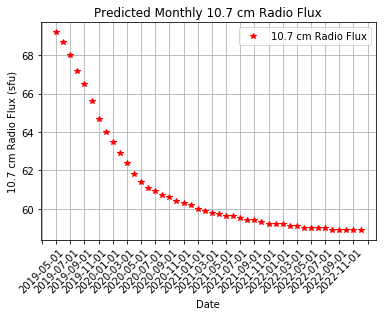

In [4]:
plt.figure()
ax=df_sorted.plot(x='date',y='flux_predicted',kind='line',style=['r*'],label='10.7 cm Radio Flux')
ax.set_xticks(np.arange(-2,46)[::2]) # The [::2] is to only display every second tick
ax.set_xticklabels(df_date_range.date[::2],rotation=45) # The [::2] is to only display every second label
plt.grid(True) # Set to 'False' to turn off the grid-lines
ax.set_ylabel('10.7 cm Radio Flux (sfu)')
ax.set_xlabel('Date')
plt.title("Predicted Monthly 10.7 cm Radio Flux")
plt.show()